In [1]:
import sys
sys.path.append('..')

In [2]:
from scratch.linear_algebra import Vector, dot

def sum_of_squares(v: Vector) -> float:
    """Computes the sum of squared elements in v"""
    return dot(v, v)

In [3]:
from typing import Callable

def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

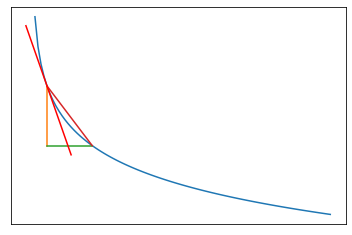

In [4]:
xs = [x for x in range(1,100)]

def f(x):
    return -log(x*.001)

def df(x):
    return -(1/x)

import matplotlib.pyplot as plt
from math import log

fig,ax = plt.subplots(1,1)
ax.plot(xs,[f(x) for x in xs])
ax.plot([5,5],[f(20),f(5)])
ax.plot([5,20],[f(20),f(20)])
ax.plot([5,20],[f(5),f(20)])
ax.plot([-2,13],[df(5)*(-2)+f(5)+1,df(5)*(13)+f(5)+1],c='r')

ax.set_xticks([])
ax.set_yticks([]);

In [5]:
def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

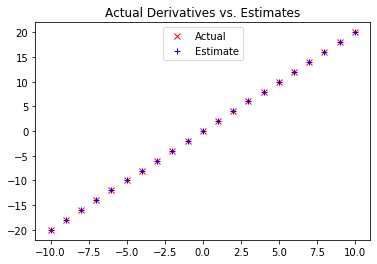

In [6]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]

# plot to show they're basically the same
import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')       # red  x
plt.plot(xs, estimates, 'b+', label='Estimate')   # blue +
plt.legend(loc=9);

# plt.show()

In [7]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    """Returns the i-th partial difference quotient of f at v"""
    w = [v_j + (h if j == i else 0)    # add h to just the ith element of v
         for j, v_j in enumerate(v)]

    return (f(w) - f(v)) / h

In [8]:
def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]

In [9]:
import random
from scratch.linear_algebra import distance, add, scalar_multiply

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)    # compute the gradient at v
    v = gradient_step(v, grad, -0.01)    # take a negative gradient step
    print(epoch, v)

assert distance(v, [0, 0, 0]) < 0.001    # v should be close to 0

0 [6.431717930244593, 2.3737153883415347, 4.793262481146808]
1 [6.303083571639702, 2.3262410805747042, 4.697397231523872]
2 [6.177021900206908, 2.27971625896321, 4.603449286893394]
3 [6.05348146220277, 2.2341219337839457, 4.511380301155526]
4 [5.9324118329587145, 2.189439495108267, 4.421152695132416]
5 [5.81376359629954, 2.145650705206102, 4.332729641229768]
6 [5.697488324373549, 2.10273769110198, 4.246075048405173]
7 [5.583538557886079, 2.0606829372799402, 4.1611535474370696]
8 [5.471867786728357, 2.0194692785343413, 4.077930476488328]
9 [5.36243043099379, 1.9790798929636546, 3.9963718669585617]
10 [5.255181822373914, 1.9394982951043815, 3.9164444296193905]
11 [5.150078185926436, 1.900708329202294, 3.838115541027003]
12 [5.047076622207907, 1.862694162618248, 3.761353230206463]
13 [4.946135089763749, 1.825440279365883, 3.686126165602334]
14 [4.847212387968474, 1.7889314737785653, 3.612403642290287]
15 [4.750268140209105, 1.753152844302994, 3.5401555694444813]
16 [4.655262777404923, 1.7

In [10]:
# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept    # The prediction of the model.
    error = (predicted - y)              # error is (predicted - actual)
    squared_error = error ** 2           # We'll minimize squared error
    grad = [2 * error * x, 2 * error]    # using its gradient.
    return grad

In [11]:
from scratch.linear_algebra import vector_mean

# Start with random values for slope and intercept.
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(5000):
    # Compute the mean of the gradients
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [32.8875193979117, 0.6957828710143913]
1 [11.399720344463915, 0.7172788246702742]
2 [25.732103809067237, 0.7172439873653975]
3 [16.172404003339516, 0.7315416031997339]
4 [22.548738071375745, 0.736250923996674]
5 [18.295727957316373, 0.7473271602200564]
6 [21.1324967796302, 0.7541282338569327]
7 [19.240378776220517, 0.7637524741688491]
8 [20.502431108735085, 0.7714653479967318]
9 [19.660649915821693, 0.7804248484094735]
10 [20.22212693099534, 0.7885246486284763]
11 [19.847629861674736, 0.7971697262622146]
12 [20.097428051989212, 0.8054230166713648]
13 [19.93082091233987, 0.8139095986900113]
14 [20.041956361068, 0.8222126004049712]
15 [19.967837319768048, 0.8306101315652292]
16 [20.017283117846276, 0.8389167486218668]
17 [19.984311077145154, 0.8472561982424694]
18 [20.006311767742424, 0.8555459969231297]
19 [19.991645596912726, 0.8638412166970258]
20 [20.00143622807591, 0.8721051798605446]
21 [19.99491414105323, 0.8803624057288993]
22 [19.999272630323226, 0.8885965950584949]
23 [19.996

962 [19.999623703590192, 4.373466251659891]
963 [19.999624455957, 4.374718942860161]
964 [19.99962520681954, 4.3759691294303975]
965 [19.999625956180797, 4.377216816378357]
966 [19.999626704043788, 4.3784620087017805]
967 [19.999627450411495, 4.37970471138842]
968 [19.99962819528692, 4.380944929416055]
969 [19.99962893867304, 4.3821826677525095]
970 [19.999629680572834, 4.383417931355678]
971 [19.999630420989277, 4.384650725173539]
972 [19.999631159925325, 4.385881054144181]
973 [19.999631897383953, 4.387108923195818]
974 [19.999632633368098, 4.38833433724681]
975 [19.999633367880726, 4.389557301205685]
976 [19.999634100924762, 4.390777819971155]
977 [19.999634832503155, 4.391995898432137]
978 [19.999635562618828, 4.393211541467776]
979 [19.999636291274708, 4.39442475394746]
980 [19.999637018473717, 4.39563554073084]
981 [19.999637744218763, 4.396843906667852]
982 [19.999638468512753, 4.398049856598735]
983 [19.999639191358593, 4.399253395354051]
984 [19.99963991275917, 4.4004545277547

1962 [19.99994914510965, 4.9153265770250085]
1963 [19.99994924678889, 4.915495873016068]
1964 [19.999949348264828, 4.915664830516825]
1965 [19.999949449537876, 4.9158334502040555]
1966 [19.99994955060844, 4.916001732753185]
1967 [19.99994965147692, 4.916169678838287]
1968 [19.99994975214373, 4.916337289132088]
1969 [19.999949852609262, 4.916504564305967]
1970 [19.999949952873926, 4.9166715050299645]
1971 [19.99995005293812, 4.916838111972779]
1972 [19.999950152802246, 4.917004385801771]
1973 [19.999950252466704, 4.91717032718297]
1974 [19.99995035193189, 4.917335936781071]
1975 [19.99995045119821, 4.917501215259441]
1976 [19.999950550266053, 4.917666163280121]
1977 [19.999950649135823, 4.9178307815038265]
1978 [19.999950747807908, 4.917995070589955]
1979 [19.999950846282715, 4.918159031196582]
1980 [19.999950944560627, 4.918322663980472]
1981 [19.999951042642042, 4.9184859695970715]
1982 [19.999951140527354, 4.918648948700519]
1983 [19.999951238216955, 4.918811601943646]
1984 [19.99995

2712 [19.99998866465591, 4.981126645284652]
2713 [19.999988687319792, 4.981164380658739]
2714 [19.999988709938357, 4.9812020405847415]
2715 [19.9999887325117, 4.981239625213511]
2716 [19.99998875503991, 4.9812771346955955]
2717 [19.999988777523075, 4.981314569181245]
2718 [19.99998879996129, 4.981351928820406]
2719 [19.999988822354638, 4.981389213762726]
2720 [19.999988844703218, 4.981426424157555]
2721 [19.99998886700711, 4.981463560153943]
2722 [19.99998888926641, 4.981500621900643]
2723 [19.999988911481204, 4.981537609546108]
2724 [19.999988933651583, 4.981574523238497]
2725 [19.99998895577763, 4.981611363125672]
2726 [19.999988977859445, 4.981648129355198]
2727 [19.999988999897106, 4.981684822074348]
2728 [19.999989021890705, 4.981721441430096]
2729 [19.99998904384033, 4.981757987569127]
2730 [19.999989065746067, 4.981794460637829]
2731 [19.99998908760801, 4.981830860782299]
2732 [19.999989109426238, 4.9818671881483425]
2733 [19.99998913120085, 4.981903442881472]
2734 [19.999989152

3828 [19.999998785463806, 4.997977796503929]
3829 [19.999998787892146, 4.997981839696385]
3830 [19.999998790315637, 4.997985874804884]
3831 [19.999998792734274, 4.997989901845591]
3832 [19.999998795148084, 4.997993920834634]
3833 [19.999998797557062, 4.997997931788112]
3834 [19.99999879996123, 4.998001934722093]
3835 [19.999998802360583, 4.99800592965261]
3836 [19.999998804755144, 4.998009916595666]
3837 [19.999998807144916, 4.9980138955672295]
3838 [19.99999880952991, 4.99801786658324]
3839 [19.999998811910135, 4.998021829659603]
3840 [19.9999988142856, 4.998025784812194]
3841 [19.999998816656316, 4.998029732056855]
3842 [19.999998819022295, 4.998033671409398]
3843 [19.99999882138354, 4.998037602885601]
3844 [19.999998823740064, 4.998041526501213]
3845 [19.99999882609188, 4.998045442271951]
3846 [19.999998828438986, 4.998049350213499]
3847 [19.99999883078141, 4.998053250341511]
3848 [19.99999883311914, 4.998057142671609]
3849 [19.999998835452207, 4.998061027219385]
3850 [19.9999988377

4781 [19.99999981967108, 4.999699752237334]
4782 [19.99999982003163, 4.999700352552531]
4783 [19.999999820391455, 4.9997009516674575]
4784 [19.999999820750567, 4.999701549584514]
4785 [19.999999821108958, 4.999702146306095]
4786 [19.99999982146663, 4.999702741834592]
4787 [19.999999821823593, 4.99970333617239]
4788 [19.999999822179834, 4.999703929321869]
4789 [19.999999822535372, 4.9997045212854045]
4790 [19.999999822890192, 4.999705112065369]
4791 [19.999999823244305, 4.999705701664128]
4792 [19.99999982359771, 4.9997062900840445]
4793 [19.99999982395041, 4.999706877327474]
4794 [19.999999824302403, 4.99970746339677]
4795 [19.999999824653695, 4.999708048294279]
4796 [19.99999982500428, 4.999708632022344]
4797 [19.999999825354166, 4.999709214583303]
4798 [19.999999825703355, 4.9997097959794905]
4799 [19.99999982605184, 4.999710376213235]
4800 [19.999999826399634, 4.999710955286861]
4801 [19.99999982674673, 4.999711533202687]
4802 [19.999999827093134, 4.999712109963029]
4803 [19.9999998

In [12]:
from typing import TypeVar, List, Iterator

T = TypeVar('T')  # this allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # Start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]


theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [18.493636452694485, 0.9975201181973613]
1 [20.07682569262701, 0.9444946671055473]
2 [20.147870919894544, 0.9718217399116259]
3 [20.012208573017475, 1.1524717853036994]
4 [20.18021019502444, 1.167017865475766]
5 [19.83297676403393, 1.1736375324204205]
6 [20.25712296288256, 1.1886754061945233]
7 [19.114215173251743, 1.2444978869749768]
8 [19.97711068564599, 1.270013247585482]
9 [20.054445216628455, 1.2863716596753059]
10 [19.569522424529058, 1.3274939750510582]
11 [19.823417434234656, 1.488055312061172]
12 [19.780721217423363, 1.4962153645464493]
13 [19.15918255814291, 1.5320100289255323]
14 [19.896777263399212, 1.4927590949241034]
15 [20.16136843035597, 1.5011127888498368]
16 [20.109740131385635, 1.518778393708791]
17 [19.88085493070666, 1.587142007447488]
18 [19.83160948769969, 1.605379378118992]
19 [19.852439129418567, 1.75873748770082]
20 [20.021170503734727, 1.77922915683471]
21 [19.877814066375745, 1.8222564349134078]
22 [20.043612616967, 1.8408278133526765]
23 [19.7008553707208

369 [19.999947410059672, 4.968040561312445]
370 [19.98630982569193, 4.9688945570522565]
371 [19.997695370047932, 4.965989028672209]
372 [20.00109748771975, 4.966815080220768]
373 [19.992626572351043, 4.9672515767068335]
374 [19.998139146716657, 4.968674268734704]
375 [20.000738520266616, 4.969033229011568]
376 [20.00112957889152, 4.970175193911207]
377 [19.99909634417054, 4.970573336469309]
378 [20.0004271662446, 4.970731737142089]
379 [19.993451221348693, 4.971095900414018]
380 [19.99982295823446, 4.971301208282455]
381 [19.993473422683937, 4.97163159697171]
382 [20.01148326865219, 4.972112733968663]
383 [20.006556582272744, 4.971968366855266]
384 [20.000545374408123, 4.973528118107827]
385 [19.99735676871919, 4.973803258696659]
386 [19.998269005514313, 4.973855550475506]
387 [19.99358722177688, 4.974107574208905]
388 [19.999412009236373, 4.973807590175607]
389 [20.000241430559907, 4.973966843351129]
390 [20.00073453681017, 4.974162488432776]
391 [19.999186680403866, 4.974483654247841

717 [19.999938580008454, 4.999734202411682]
718 [20.000002651130597, 4.999740753776755]
719 [20.000003026339776, 4.999742287574862]
720 [20.00000038034332, 4.999753655649097]
721 [20.000049897855785, 4.999756246957642]
722 [20.000020977149205, 4.999756318661607]
723 [19.999962651850492, 4.999757075010082]
724 [19.999999841807973, 4.999758711864629]
725 [20.000039013129104, 4.999762771626166]
726 [19.999988852589617, 4.999763669977905]
727 [20.00001006091392, 4.999764046501154]
728 [20.000007262784425, 4.999765361995401]
729 [19.999997667867778, 4.999766411801018]
730 [20.00001578522307, 4.999767373411009]
731 [20.000035785359326, 4.999773879603433]
732 [19.999994683269264, 4.999785188868554]
733 [19.99997811532149, 4.999787069494278]
734 [20.000006405630653, 4.9997935586114775]
735 [20.00000843686335, 4.999794568858837]
736 [19.99999809015467, 4.999795640591166]
737 [19.999987872236918, 4.999796211180359]
738 [19.999969248453144, 4.999801634871232]
739 [20.00001162758424, 4.99980414400

In [13]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1,   "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [20.1136788065113, -0.6580378732980074]
1 [20.10880095188596, -0.41528674555976564]
2 [20.104132966075465, -0.1829505668856223]
3 [20.099665266212646, 0.039417515107084196]
4 [20.095389273047218, 0.2522451700184456]
5 [20.091296693030635, 0.4559417176501438]
6 [20.08737973975383, 0.6508989168718551]
7 [20.08363079828376, 0.8374917185415283]
8 [20.08004274726169, 1.0160789869864235]
9 [20.07660860643358, 1.1870041899643526]
10 [20.073321804697834, 1.3505960583417171]
11 [20.07017602015613, 1.507169219833775]
12 [20.06716521950953, 1.6570248037703224]
13 [20.064283560524427, 1.8004510191472156]
14 [20.061525564423206, 1.9377237100474585]
15 [20.058885879112445, 2.0691068860205295]
16 [20.05635946759742, 2.1948532295159837]
17 [20.05394142261229, 2.3152045817280626]
18 [20.051627133512692, 2.4303924078447086]
19 [20.04941213689565, 2.5406382428249032]
20 [20.04729217934003, 2.6461541168518594]
21 [20.045263168434005, 2.7471429630295345]
22 [20.04332118197097, 2.8437990071662]
23 [20.041